In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize # For tokenizing the words
from nltk.corpus import stopwords # To Remove the stop words
from collections import Counter # To build the category

from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize


from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import os 
import matplotlib.pyplot as plt 
from nltk.tokenize import RegexpTokenizer

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize # For tokenizing the words
from nltk.corpus import stopwords # To Remove the stop words
from collections import Counter # To build the category

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize # To tokenize sentences
ps = PorterStemmer() # To perform stemming

import pickle

In [2]:
# Read the data from the file
with open('./drive/MyDrive/6120/cleaned df.pkl', 'rb') as fid:
     cleanedDF = pickle.load(fid)

In [3]:
cleanedDF["complete_posting"] = cleanedDF["company_profile"] + " " + cleanedDF["description"] + " " + cleanedDF["requirements"] + " " + cleanedDF["benefits"]

In [4]:
cleanedDF

,company_profile,description,requirements,benefits,fraudulent,complete_posting
0,food52 weve created groundbreaking awardwinnin...,food52 fastgrowing james beard awardwinning on...,experience content management systems major pl...,experience content management systems major pl...,0,food52 weve created groundbreaking awardwinnin...
1,90 seconds worlds cloud video production servi...,organised focused vibrant awesomedo passion cu...,expect key responsibility communicate client 9...,expect key responsibility communicate client 9...,0,90 seconds worlds cloud video production servi...
2,valor services provides workforce solutions me...,client located houston actively seeking experi...,implement precommissioning commissioning proce...,implement precommissioning commissioning proce...,0,valor services provides workforce solutions me...
3,passion improving quality life geography heart...,company esri environmental systems research in...,education bachelors masters gis business admin...,education bachelors masters gis business admin...,0,passion improving quality life geography heart...
4,spot source solutions llc global human capital...,job title itemization review manager location ...,qualifications rn license state texas diploma ...,qualifications rn license state texas diploma ...,0,spot source solutions llc global human capital...
...,...,...,...,...,...,...
17866,Vend is looking for some awesome new talent to...,Just in case this is the first time youâ€™ve v...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,Vend is looking for some awesome new talent to...
17867,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting-Â Desire to have ...,Health &amp; WellnessMedical planPrescription ...,0,WebLinc is the e-commerce platform and service...
17868,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,NaN
17869,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,NaN


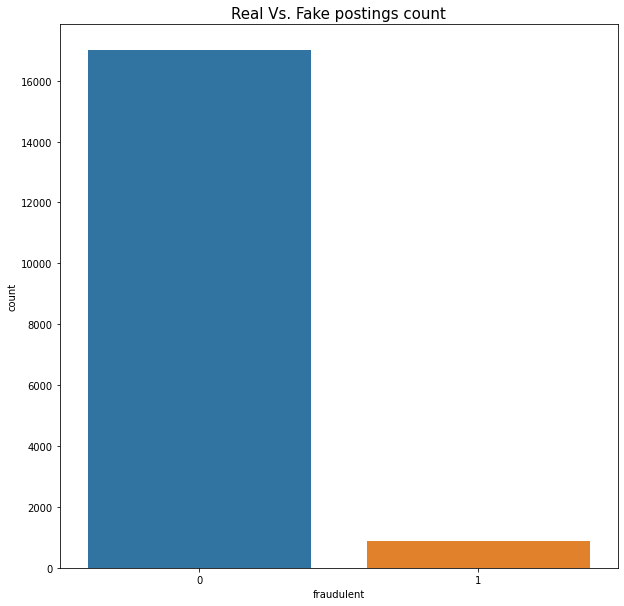

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,10))
sns.countplot(x="fraudulent", data=cleanedDF)
plt.title("Real Vs. Fake postings count", fontsize = 15)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

trainDF, testDF = train_test_split(cleanedDF, test_size=0.33, random_state = 1)



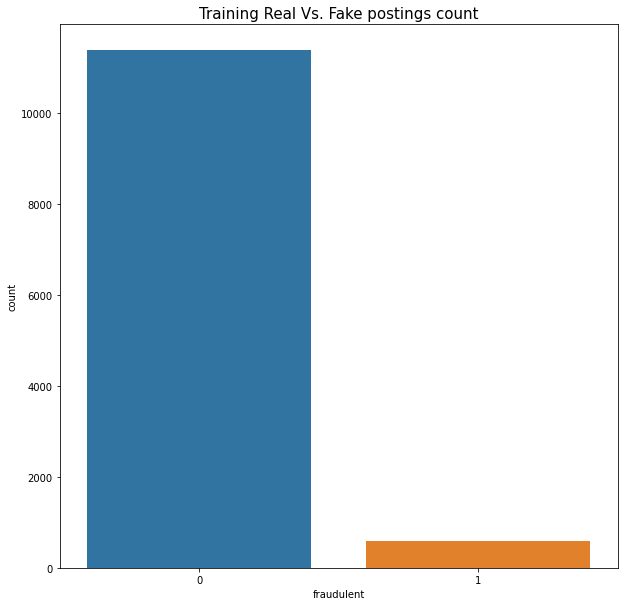

In [7]:
plt.figure(figsize = (10,10))
sns.countplot(x="fraudulent", data=trainDF)
plt.title("Training Real Vs. Fake postings count", fontsize = 15)
plt.show()

In [8]:
from sklearn.utils import resample
import random
import pandas as pd
import math

random.seed(1)

df_majority = trainDF[trainDF["fraudulent"]==0]
df_minority = trainDF[trainDF["fraudulent"]==1]

negative_upsample = resample(df_minority, replace = True, 
                        n_samples = math.ceil(df_majority.shape[0]/2),
                        random_state = 101)

negative_undersample = resample(df_majority, replace = True, 
                        n_samples = math.ceil(df_majority.shape[0]/2),
                        random_state = 101)

df_upsampled = pd.concat([negative_undersample, negative_upsample])  # concat two data frames i,e majority class data set and upsampled minority class data set
df_upsampled = df_upsampled.sample(frac = 1, random_state = 101)

In [9]:
import math
math.ceil(df_majority.shape[0]/2)

5690

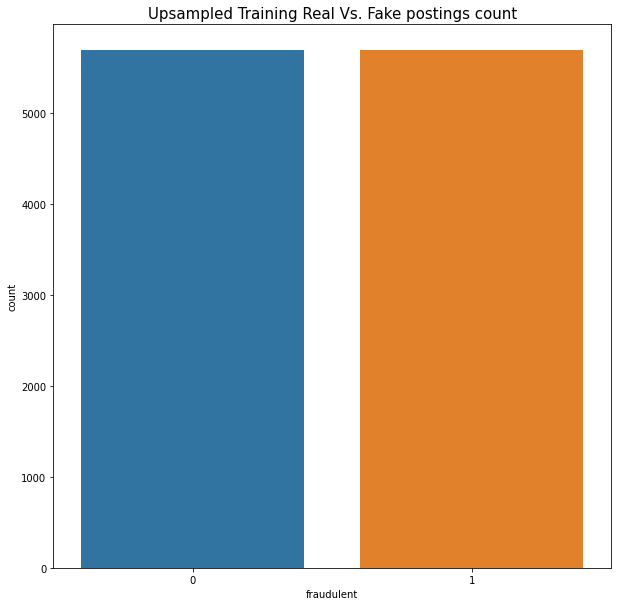

In [10]:
plt.figure(figsize = (10,10))
sns.countplot(x="fraudulent", data=df_upsampled)
plt.title("Upsampled Training Real Vs. Fake postings count", fontsize = 15)
plt.show()

In [11]:
train_full = df_upsampled['complete_posting']

test_full = testDF['complete_posting']

trainY = df_upsampled['fraudulent']

testY = testDF['fraudulent']

# Multinomial Naive Bayes

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

train_count = vectorizer.fit_transform(train_full.values.astype('U')).toarray()
val_count = vectorizer.transform(test_full.values.astype('U')).toarray()


In [13]:
train_count.shape

(11380, 51708)

In [14]:

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=1)
clf.fit(train_count, trainY)

MultinomialNB(alpha=1)

In [18]:
val_preds = clf.predict(val_count)
from sklearn.metrics import roc_auc_score, roc_curve, auc, recall_score
acc = roc_auc_score(testY, val_preds) * 100
recall = recall_score(testY, val_preds)
print("recall score: ", recall)
print("auc score: ", acc)

recall score:  0.8708487084870848
auc score:  91.01000251161211


In [ ]:
`fpr, tpr, thresholds = roc_curve(testY, val_preds)
auc = auc(fpr, tpr)

Text(0, 0.5, 'tpr')

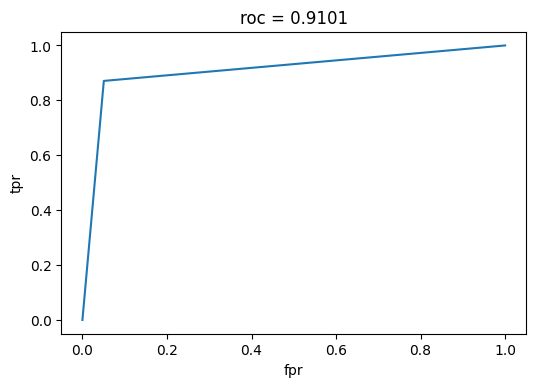

In [ ]:
# roc curve
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(fpr, tpr)
plt.title('roc = {:.4f}'.format(auc))
plt.xlabel('fpr')
plt.ylabel('tpr')


# BurnoulliNB

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(train_count, trainY)

In [ ]:
val_preds = clf.predict(val_count)
from sklearn.metrics import roc_auc_score
acc = roc_auc_score(testY, val_preds) * 100
print(acc)